In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Wine Review Dataset

In [10]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/winemag-data_first150k.csv")
df.drop(columns='Unnamed: 0',axis = 0,inplace=True)
df.head()

,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [15]:
# find measure of central tendency for points and price column
pt_mean = df['points'].mean()
pt_median = df['points'].median()
price_mean = df['price'].mean()
price_median = df['price'].median()
print("======Points======")
print(f"mean: {pt_mean} meadian: {pt_median}")
print("======Price=======")
print(f"mean: {price_mean} meadian: {price_median}")

======Points======
mean: 87.8884184721394 meadian: 88.0
======Price=======
mean: 33.13148249353299 meadian: 24.0


In [19]:
# find measure of spread for points and price col
pt_range = df['points'].max()-df['points'].min()
price_range = df['price'].max()-df['price'].min()
pt_var = df['points'].var()
price_var = df['price'].var()
pt_std = np.sqrt(pt_var)
price_std = np.sqrt(price_var)
print("======Points========")
print(f"range: {pt_range} , variance: {pt_var} , standard deviation: {pt_std}")
print("======Price========")
print(f"range: {price_range} , variance: {price_var} , standard deviation: {price_std}")

======Points========
range: 20 , variance: 10.38380864836295 , standard deviation: 3.2223917589832167
======Price========
range: 2296.0 , variance: 1319.326635745001 , standard deviation: 36.32253619648552


In [21]:
# obtain skewness and kurtosis for points col
from scipy.stats import kurtosis,skew
pt_skew = skew(df['points'])
pt_kurtosis = kurtosis(df['points'])
print(f"skewness: {pt_skew} , kurtosis: {pt_kurtosis}")

skewness: 0.14283121423675518 , kurtosis: -0.2864463416644991


In [22]:
# z score of points col
from scipy.stats import zscore
print(zscore(df['points']))

0         2.517263
1         2.517263
2         2.517263
3         2.517263
4         2.206934
            ...   
150925    0.965616
150926    0.965616
150927    0.965616
150928    0.655286
150929    0.655286
Name: points, Length: 150930, dtype: float64


In [20]:
# iqr for points col
q3 = df['points'].quantile(0.75)
q1 = df['points'].quantile(0.25)
print("iqr: ",q3-q1)

iqr:  4.0


## Customer Income Dataset

In [28]:
df = pd.read_csv("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/customer_income_data.csv")
df.head()

,CustomerID,CustomerGender,CustomerAge,CustomerCity,AnnualIncome,CreditScore,SpendingScore,CustomerCityID
0,1001,Male,49,Bengaluru,527547.58850,653,78,1
1,1002,Male,59,Bengaluru,207143.19760,630,63,1
2,1003,Female,54,Delhi,164423.84570,555,69,4
3,1004,Female,42,Bengaluru,56220.36443,699,30,1
4,1005,Female,30,Bengaluru,256194.36190,793,6,1


In [29]:
# check null values and drop them
df.isnull().sum()

CustomerID        0
CustomerGender    0
CustomerAge       0
CustomerCity      0
AnnualIncome      0
CreditScore       0
SpendingScore     0
CustomerCityID    0
dtype: int64

In [30]:
# measure of central tendency Annual Income col
income_mean = df['AnnualIncome'].mean()
income_median = df['AnnualIncome'].median()
print(f"mean: {income_mean} , median: {income_median}")

mean: 285143.93164644 , median: 263418.50555


In [33]:
# measure of variance std and skewness for spending score
from scipy.stats import skew,kurtosis
sp_var = df['SpendingScore'].var()
sp_std = np.sqrt(sp_var)
sp_skew = skew(df['SpendingScore'])
print(f"variance: {sp_var} , standard dev: {sp_std} , skewness: {sp_skew}")

variance: 824.9929396984927 , standard dev: 28.72269032835352 , skewness: 0.10081837365183154


In [37]:
# outlier on Annual Income and Spending Score based on Z score
from scipy.stats import zscore
z = np.abs(zscore(df[['AnnualIncome','SpendingScore']]))
z.head()

,AnnualIncome,SpendingScore
0,1.435993,0.952679
1,0.462074,0.429133
2,0.715143,0.638551
3,1.356137,0.722668
4,0.171497,1.560341


In [38]:
np.where(z>2)

(array([ 62,  65, 114, 148, 155, 166, 171, 177, 194]),
 array([0, 0, 0, 0, 0, 0, 0, 0, 0]))

In [40]:
z.iloc[62]

AnnualIncome     2.312233
SpendingScore    0.289521
Name: 62, dtype: float64

<Axes: xlabel='CustomerAge', ylabel='SpendingScore'>

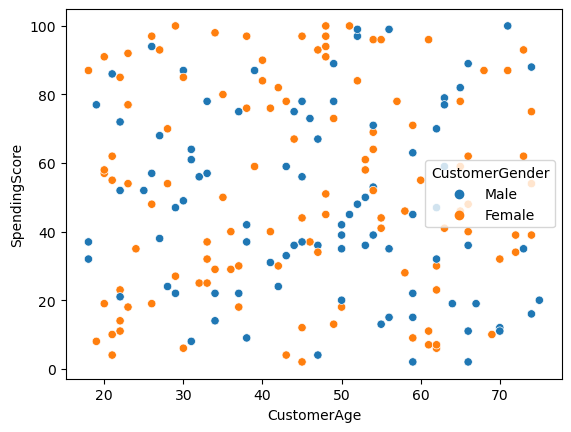

In [43]:
# outlier on Customer Age and Spending Score using scatter plot
sns.scatterplot(x=df['CustomerAge'],y=df['SpendingScore'],hue=df['CustomerGender'])
# no outlier

## US Arrest Dataset

In [49]:
df = pd.read_excel("/Users/saprativasarkar/Desktop/ML/10_Python_and_OOPS/11_statistics/dataset/USArrests.xlsx").drop(columns='Unnamed: 0')
df.head()

,Murder,Assault,UrbanPop,Fraud
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6


In [50]:
# measure of spread(iqr) and shape(skew,kurtosis) for assault and fraud col
from scipy.stats import skew,kurtosis
iqr_assault = df['Assault'].quantile(0.75)-df['Assault'].quantile(0.25)
iqr_fraud = df['Fraud'].quantile(0.75)-df['Fraud'].quantile(0.25)
print("======Assault========")
print("iqr: ",iqr_assault)
print("skew: ",skew(df["Assault"]))
print("kurtosis: ",kurtosis(df["Assault"]))
print("======Fraud========")
print("iqr: ",iqr_fraud)
print("skew: ",skew(df["Fraud"]))
print("kurtosis: ",kurtosis(df["Fraud"]))

======Assault========
iqr:  140.0
skew:  0.2273178665911123
kurtosis:  -1.069020051573077
======Fraud========
iqr:  11.100000000000001
skew:  0.7769613202124208
kurtosis:  0.20189779308426514


In [52]:
# z score on assault col
from scipy.stats import zscore
print(zscore(df["Assault"]).head())

0    0.790787
1    1.118060
2    1.493817
3    0.233212
4    1.275635
Name: Assault, dtype: float64


In [61]:
# outlier urban population using iqr
iqr = df['UrbanPop'].quantile(0.75)-df['UrbanPop'].quantile(0.25)
upper_limit = df['UrbanPop'].quantile(0.75)+(1.5*iqr)
lower_limit = df['UrbanPop'].quantile(0.25)-(1.5*iqr)
print(f"iqr: {iqr} , Upper Limit: {upper_limit} , Lower Limit: {lower_limit}")
df_oulier = df[(df['UrbanPop']<lower_limit) | (df['UrbanPop']>upper_limit)]
df_oulier

iqr: 23.25 , Upper Limit: 112.625 , Lower Limit: 19.625


,Murder,Assault,UrbanPop,Fraud
20,4.4,149,30000,16.3


In [67]:
# outlier urban population using z score
from scipy.stats import zscore
z = np.abs(zscore(df['UrbanPop']))
outlier_pop = np.where(z>2)
print(outlier_pop[0])
df.iloc[20]

[20]


Murder          4.4
Assault       149.0
UrbanPop    30000.0
Fraud          16.3
Name: 20, dtype: float64